In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
COLORS = {
    'red': [(0, 70, 50), (10, 255, 255), (170, 70, 50), (180, 255, 255)],
    'green': [(100, 20, 100), (255, 10, 255), (45, 100, 50), (90, 255, 255)],
    'black': []
}
IMG_PATH = '../../imgs/{}.jpg'
IMG_NAME = 'simple'
OPTIMAL_IMG_SIZE = 480

In [3]:
def display(img):
    b, g, r = cv.split(img)
    rgb_img = cv.merge([r,g,b])
    plt.imshow(rgb_img)
    plt.show()
    
    
def get_mask(hsv, color):
    mask1 = cv.inRange(hsv, COLORS[color][0], COLORS[color][1])
    mask2 = cv.inRange(hsv, COLORS[color][2], COLORS[color][3])
    return mask1 | mask2

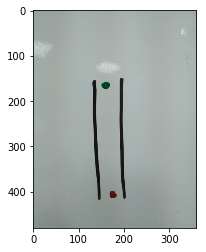

In [4]:
img = cv.imread(IMG_PATH.format(IMG_NAME))

if len(img) > OPTIMAL_IMG_SIZE:
    fdelta = OPTIMAL_IMG_SIZE/len(img)
    img = cv.resize(img, (0,0), fx=fdelta, fy=fdelta)

display(img)

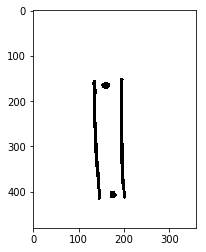

In [58]:
# preprocessing
blur = cv.bilateralFilter(img,18,100,100)
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
mred, mgreen = get_mask(hsv, 'red'), get_mask(hsv, 'green')
gray = cv.cvtColor(blur, cv.COLOR_BGR2GRAY)

#plt.imshow(cv.merge(cv.split(gray)[::-1]))
_, thr = cv.threshold(gray, 125, 255, cv.THRESH_BINARY)
#thr = cv.cvtColor(thr, cv.COLOR_GRAY2BGR)
masked_img = cv.bitwise_not(thr, thr,
                                mask=cv.bitwise_and(mred, mgreen))
plt.imshow(thr, cmap='gray')
#plt.imshow(cv.bitwise_xor(img, mgreen))
plt.show()

38


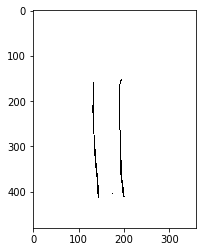

In [76]:
#thr_8 = cv.cvtColor(thr, cv.COLOR_GRAY2BGR)

edges = cv.Canny(thr, 100, 255)
derp,contours,hierarchy = cv.findContours(edges,cv.RETR_LIST,cv.CHAIN_APPROX_SIMPLE)
hull = [cv.convexHull(cnt) for cnt in contours]
for i, c in enumerate(contours):
    res = cv.drawContours(thr, contours, i, (0,0,0))
    
plt.imshow(res, cmap='gray')
print(len(contours))
plt.show()